In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('../datasets/index_1.csv')
df2 = pd.read_csv('../datasets/index_2.csv')

In [3]:
df = pd.concat([df1, df2], ignore_index=True)

In [4]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   card         3547 non-null   object 
 4   money        3898 non-null   float64
 5   coffee_name  3898 non-null   object 
dtypes: float64(1), object(5)
memory usage: 182.8+ KB


In [6]:
df.isna().sum()

date             0
datetime         0
cash_type        0
card           351
money            0
coffee_name      0
dtype: int64

In [7]:
df.isna().mean() * 100

date           0.000000
datetime       0.000000
cash_type      0.000000
card           9.004618
money          0.000000
coffee_name    0.000000
dtype: float64

In [8]:
df.describe()


,money
count,3898.00000
mean,31.38060
std,5.06461
min,15.00000
25%,27.92000
50%,32.82000
75%,35.76000
max,40.00000


In [9]:
df.describe(include='object')  

,date,datetime,cash_type,card,coffee_name
count,3898,3898,3898,3547,3898
unique,381,3890,2,1316,34
top,2025-02-26,2025-02-09 18:01:22,card,ANON-0000-0000-0012,Americano with Milk
freq,35,3,3729,129,824


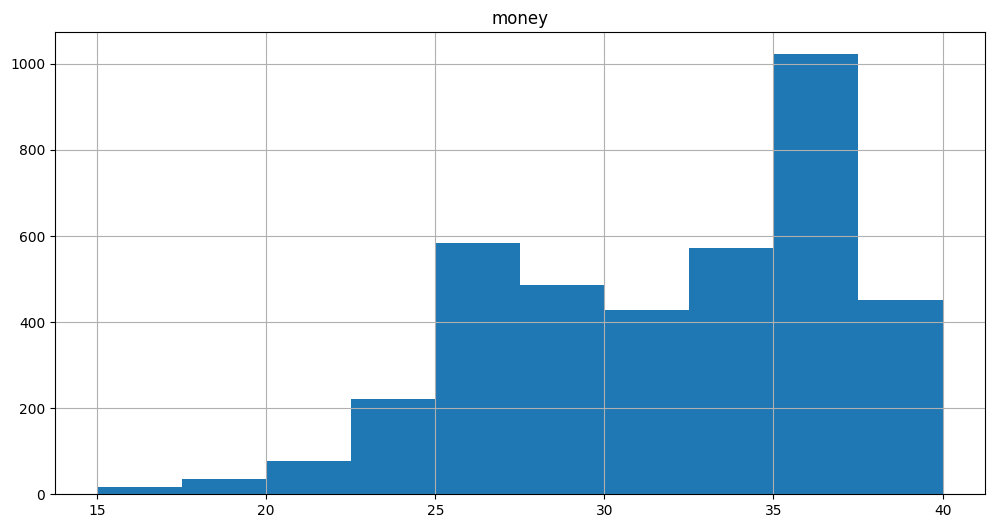

In [10]:
df.hist(figsize=(12,6))
plt.show()


<Axes: xlabel='cash_type'>

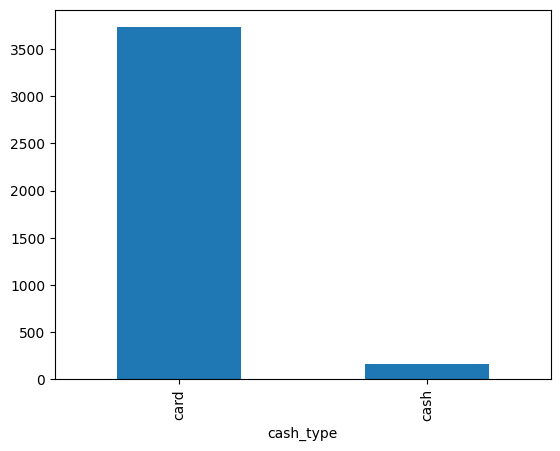

In [11]:
df['cash_type'].value_counts()
df['cash_type'].value_counts().plot(kind='bar')


<Axes: xlabel='coffee_name'>

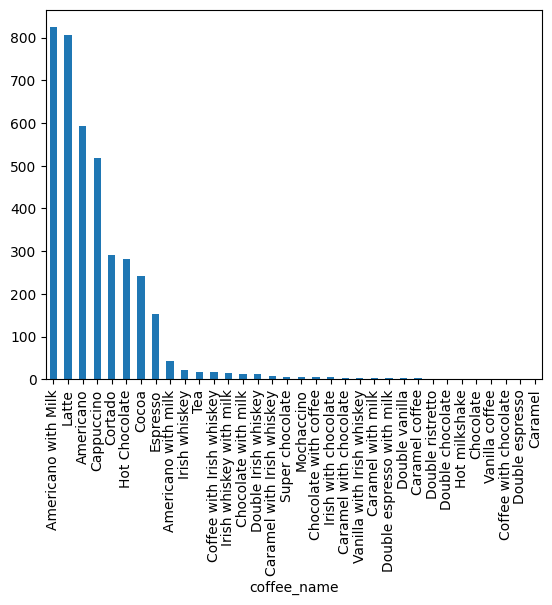

In [12]:
df['coffee_name'].value_counts()
df['coffee_name'].value_counts().plot(kind='bar')


<Axes: xlabel='money'>

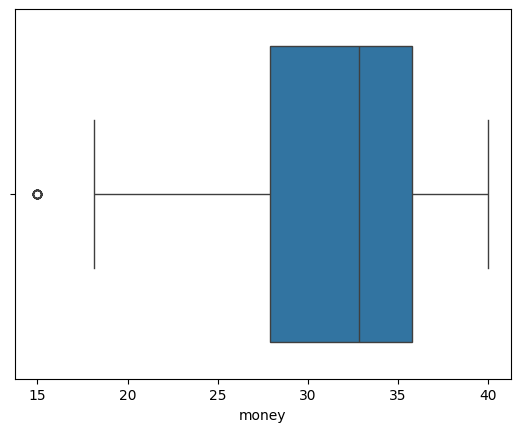

In [13]:
sns.boxplot(x=df['money'])


<Axes: xlabel='date'>

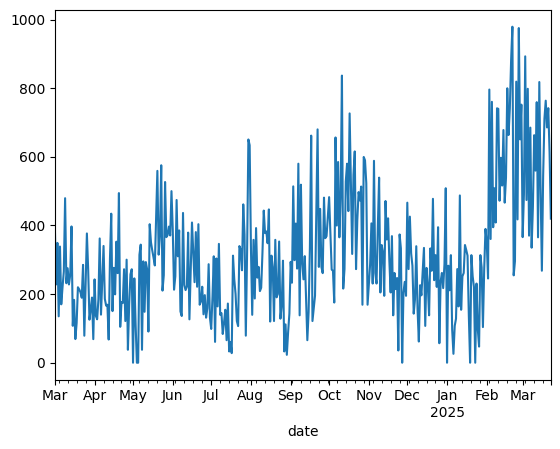

In [14]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date').resample('D')['money'].sum().plot()
